In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

from Fitter import Fitter
from Fitter import Functions
import numpy as np
import matplotlib.pyplot as plt
import random, scipy

In [132]:
f = Fitter("linear") #linear, expo, gaussian, gaussian2d, poly

# Use the fit function of fit to, well, fit a given x,y data
# Let's destinguish two type of function. Simple (linear, expo) and Complex(gaussian, gaussian2d, poly).
# For Simple function fit(x,y) are fit(x,y,p0) are valid inputs. 
# In the first option the fit attempts to estimate the initial starting point 
# In the second option a list of parameters if used to innitilized the fit

# For Complex functions fit(x,y, int) are fit(x,y,list) are valid inputs. 
# If the option with a int is used then the algorithm will use this value to generate the fitting function
# For example, fit(xx,yy,3) will fit a sum of two gaussian(2d) or a 3-degree polinom.   
# If fit(x,y,list) is used then the number of componenets (n gaussians, n-degree function) is inferred.

#To extract the fit results use

f.fit([0,10], [0,-10])
p = f.getParams()
print(p) # prints a string with the available variables.
print(p.vars) # list of the results
print(p.m) # slope for the "linear" type
print(p.b) # slope for the "intercept" type

#Use f.evaluate(xx) to evaluate the function, like for plotting and such
print(f.evaluate([20]))

vars: [-1.0, 0.0], m: -1.0, b: 0.0
[-1.0, 0.0]
-1.0
0.0
[-20.]


0.9994363130564641 5.024863703456147


<IPython.core.display.Javascript object>


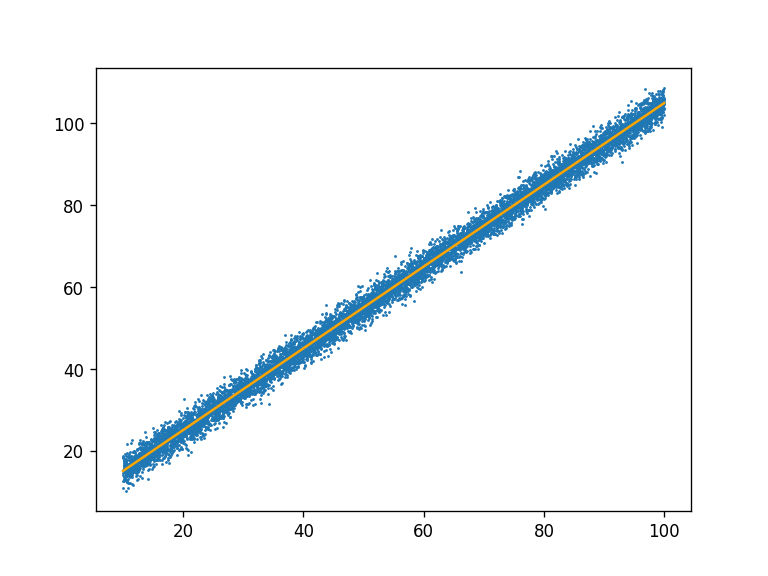

In [120]:
f = Fitter("linear")

m, b = 1,0
xx = np.arange(10,100,0.01)
yy = xx*m+b + np.random.normal(5, 2, size = xx.shape)

f.fit(xx,yy)
p = f.getParams()
print(p.m,p.b)

fig = plt.figure()
plt.scatter(xx, yy,s=0.5)

plt.plot(xx, xx*p.m+p.b, c="orange")

<IPython.core.display.Javascript object>


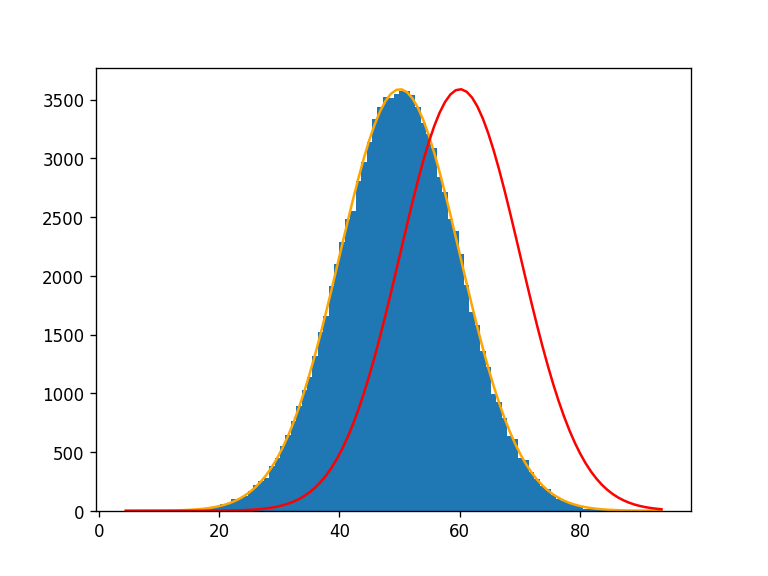

x,amp,mean,sigma
Estimating p0 : [3577.0, 49.005606195688664, 25.968226433826185]
vars: [3589.0682074189617, 50.04164964071035, 9.996600423842018], amp: 3589.0682074189617, mean: 50.04164964071035, sigma: 9.996600423842018
Mean is:  50.04164964071035
Sigma is:  9.996600423842018
Amplitude is:  3589.0682074189617
[3589.0682074189617, 50.04164964071035, 9.996600423842018]


In [118]:
f = Fitter("gaussian")

mu, sig = 50,10
yy = np.random.normal(mu, sig, size = 100000)

fig = plt.figure()
res = plt.hist(yy, bins=100)

yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5
print(f)

p0=[10,30,10]
f.fit(xx,yy)
#or f.fit(xx,yy,p0=p0)
p = f.getParams()
print(p)
print("Mean is: ", p.mean)
print("Sigma is: ", p.sigma)
print("Amplitude is: ", p.amp)
print(p.vars)
plt.plot(xx,f.evaluate(xx), c="orange")

plt.plot(xx,f.func(xx, p.amp, p.mean+10, p.sigma), c="red")

<IPython.core.display.Javascript object>


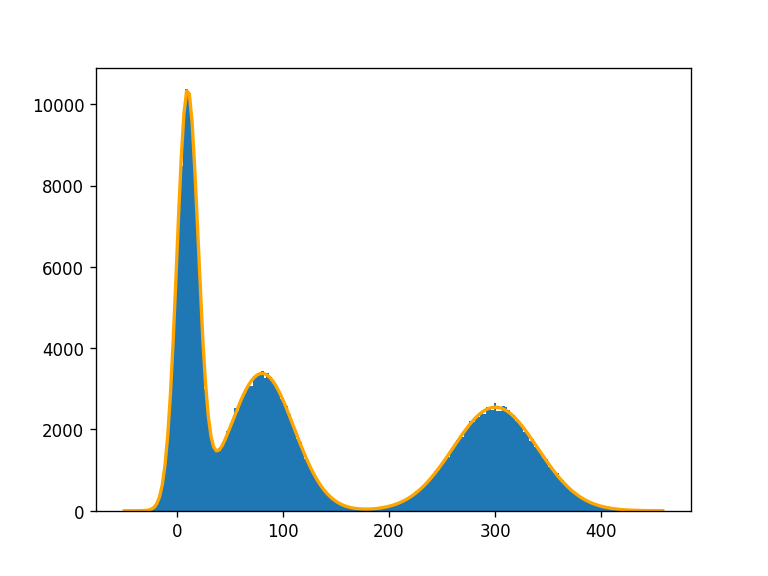

Estimating p0 : [10369.0, 33.43452209884974, 48.58255456620346, 2336.0, 201.74874876289985, 48.58255456620346, 2663.0, 370.06297542694995, 48.58255456620345]
[1.01543537e+04 1.00205823e+01 1.00348156e+01 2.54862239e+03
 3.00150645e+02 3.98953097e+01 3.37953614e+03 8.02512051e+01
 3.00869957e+01]
vars: [10154.353709062827, 10.020582319084728, 10.034815583919771, 2548.622391479796, 300.1506449861443, 39.895309747835284, 3379.536141348954, 80.25120510282642, 30.08699574643482], amp_0: 10154.353709062827, mean_0: 10.020582319084728, sigma_0: 10.034815583919771, amp_1: 2548.622391479796, mean_1: 300.1506449861443, sigma_1: 39.895309747835284, amp_2: 3379.536141348954, mean_2: 80.25120510282642, sigma_2: 30.08699574643482


In [137]:
f = Fitter("gaussian")

mu, sig = 20,10
m2 = np.array(np.random.normal(10, 10, size = 100000))
m1 = np.array(np.random.normal(80, 30, size = 100000))
m3 = np.array(np.random.normal(300, 40, size = 100000))

yy = np.concatenate((m2, m1,m3))
fig = plt.figure()

res = plt.hist(yy, bins=200)
yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5

f.fit(xx,yy,3)
p = f.getParams()
print(f.par)
print(p)

plt.plot(xx,f.evaluate(xx), c="orange", lw=2)

<IPython.core.display.Javascript object>


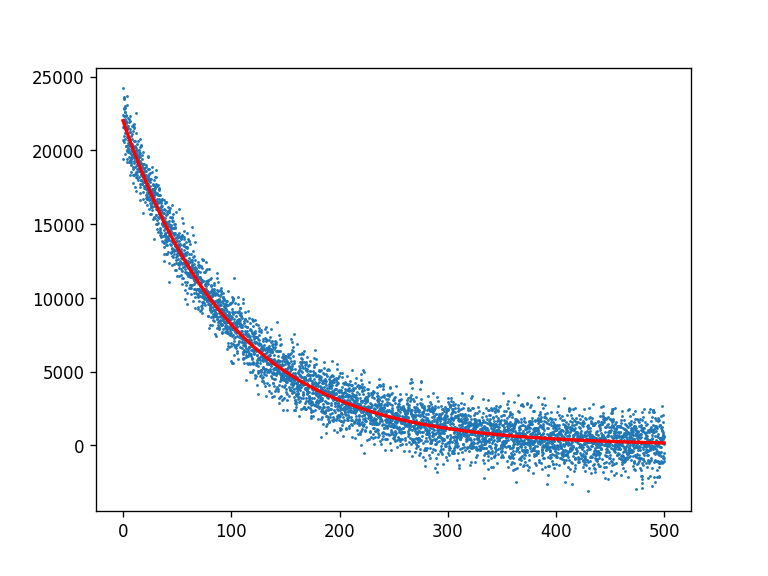

[ 9.99944506e+00 -9.88911086e-03]
vars: [9.99944505617925, -0.009889110862083935], p0: 9.99944505617925, p1: -0.009889110862083935


In [138]:
f = Fitter("expo")
fig = plt.figure()

p0, p1 = 10, -0.01
xx = np.arange(0,500,0.1)
yy = np.exp(p0+p1*xx) +np.random.normal(50, 1000, size = xx.shape)

f.fit(xx,yy)
p = f.getParams()
print(f.par)
print(p)
plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)

/tmp/ipykernel_229/2348173969.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  pts = numpy_2d([0, 0], cov, size=10000)


[-0.03701371  0.00365513  2.70211692  0.63232492  0.09269105  0.43940135]
vars: [-0.037013710651946335, 0.003655134116235545, 2.7021169164015038, 0.6323249187065061, 0.09269104503099822, 0.4394013521391972], x0_0: -0.037013710651946335, y0_0: 0.003655134116235545, sigma_x_0: 2.7021169164015038, sigma_y_0: 0.6323249187065061, amp_0: 0.09269104503099822, theta_0: 0.4394013521391972


<IPython.core.display.Javascript object>


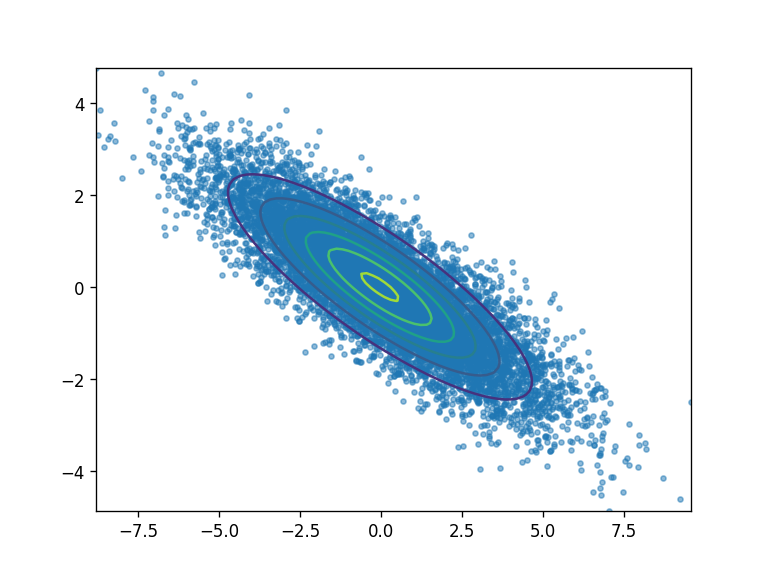

In [139]:
numpy_2d = np.random.multivariate_normal
f = Fitter("gaussian2d")

cov = np.array([[6, -3], [-3, 1]])  # to generate our testing dataset
pts = numpy_2d([0, 0], cov, size=10000)
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y)
p = f.getParams()
print(f.par)
print(p)

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

[ 0.01804085 -0.0482476   2.80370115  1.23593884  0.02275211  0.58868224
  3.91789872  3.98822478  2.22313308  4.08413218  0.00883508 -0.27724649]
vars: [0.01804085203602291, -0.04824759835311257, 2.8037011471422515, 1.235938837872392, 0.02275211370224196, 0.5886822442468663, 3.9178987175785434, 3.98822477770154, 2.2231330785576704, 4.084132184032448, 0.008835080428521469, -0.2772464937606522], x0_0: 0.01804085203602291, y0_0: -0.04824759835311257, sigma_x_0: 2.8037011471422515, sigma_y_0: 1.235938837872392, amp_0: 0.02275211370224196, theta_0: 0.5886822442468663, x0_1: 3.9178987175785434, y0_1: 3.98822477770154, sigma_x_1: 2.2231330785576704, sigma_y_1: 4.084132184032448, amp_1: 0.008835080428521469, theta_1: -0.2772464937606522
4.084132184032448


<IPython.core.display.Javascript object>


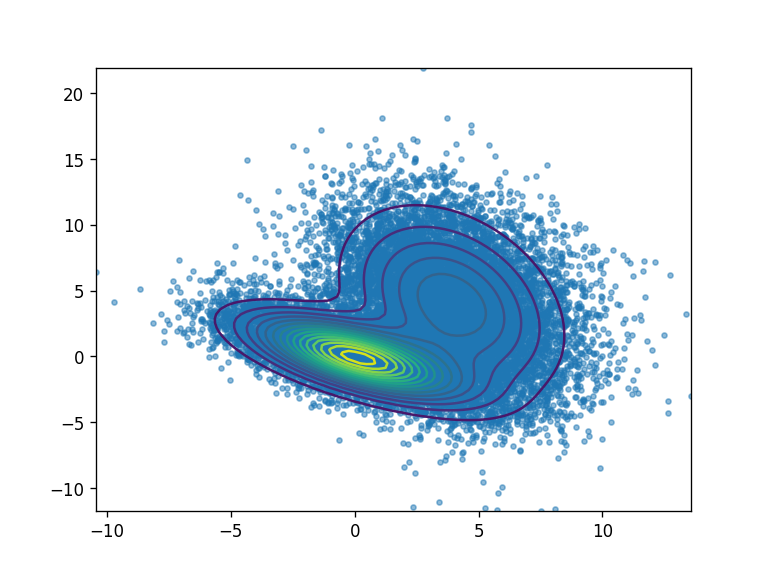

In [140]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal  # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
cov1 = np.array([[6, -3], [-3, 15]])

pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([4, 4], cov1, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,2)
p = f.getParams()
print(f.par)
print(p)
print(p.sigma_y_1)

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)), levels=20)

[-1.05347903e-01  1.26757433e-02  2.79730230e+00  1.20774165e+00
  1.56417196e-02  5.78730195e-01  1.92181204e+00  5.02043777e+00
  2.82383590e+00  1.23251569e+00  1.52601005e-02  5.94104381e-01
  1.49613405e+01  4.96218694e+00  2.81532028e+00  1.21216003e+00
  1.54196219e-02  5.95659329e-01]
vars: [-0.1053479031095741, 0.012675743260844816, 2.7973023002514434, 1.2077416503247642, 0.0156417195847819, 0.5787301951280993, 1.9218120406842203, 5.020437769081331, 2.8238359008763916, 1.2325156884032602, 0.015260100468504885, 0.5941043806015123, 14.96134054538528, 4.962186935973519, 2.8153202792000735, 1.2121600348276096, 0.015419621938231527, 0.595659328539283], x0_0: -0.1053479031095741, y0_0: 0.012675743260844816, sigma_x_0: 2.7973023002514434, sigma_y_0: 1.2077416503247642, amp_0: 0.0156417195847819, theta_0: 0.5787301951280993, x0_1: 1.9218120406842203, y0_1: 5.020437769081331, sigma_x_1: 2.8238359008763916, sigma_y_1: 1.2325156884032602, amp_1: 0.015260100468504885, theta_1: 0.594104380

<IPython.core.display.Javascript object>


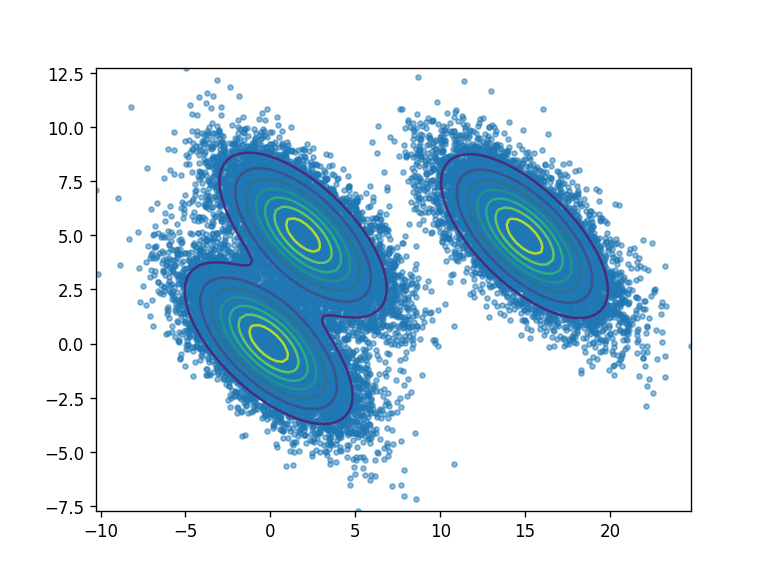

In [141]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([2, 5], cov, size=10000)
                      ,numpy_2d([15, 5], cov, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,3)
p = f.getParams()
print(f.par)
print(p)
print(p.sigma_x_2)
fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

(5000,)
p0  3
1666
Estimate p0,  [558.4001139542441, 858.8950656020679, 1141.3380163851127]
[  9.87550187   5.57613226 -27.76946884]
vars: [9.8755018711178, 5.576132261790346, -27.769468837124368], a: 9.8755018711178, b: 5.576132261790346, c: -27.769468837124368
9.8755018711178


<IPython.core.display.Javascript object>


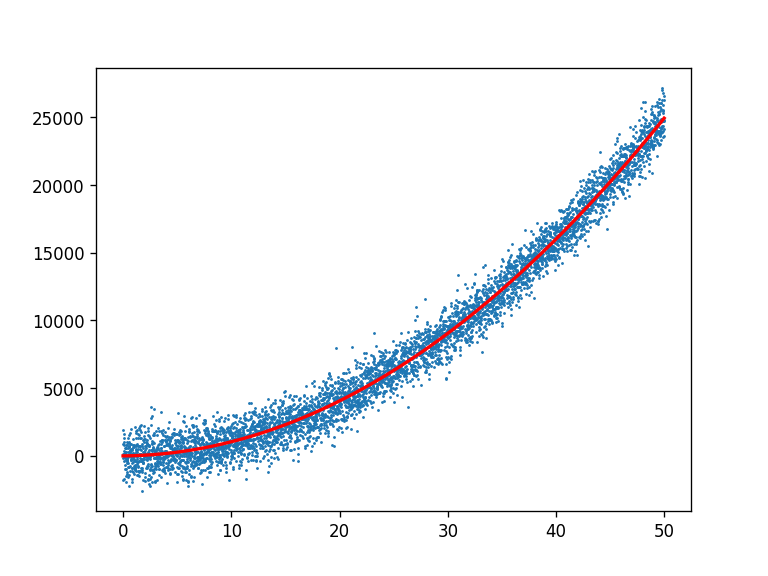

In [142]:
f = Fitter("poly")

p0, p1, p2 = 10, -0.01,3
xx = np.arange(0,50,0.01)

print(xx.shape)
yy = p0*xx**2+p1*xx+p2+np.random.normal(10, 1000, size = xx.shape)

f.fit(xx,yy,p0=3)
p = f.getParams()
print(f.par)
print(p)
print(p.a)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)

(10000,)
p0  4
2500
Estimate p0,  [-26955.164074775224, -34601.52611667642, -579116.4751007047, -28884.460089361113]
[ -2.02548657   2.36146269  28.4347662  148.30842776]
vars: [-2.0254865737665364, 2.361462685663648, 28.434766196072086, 148.30842775561226], a: -2.0254865737665364, b: 2.361462685663648, c: 28.434766196072086, d: 148.30842775561226
-2.0254865737665364


<IPython.core.display.Javascript object>


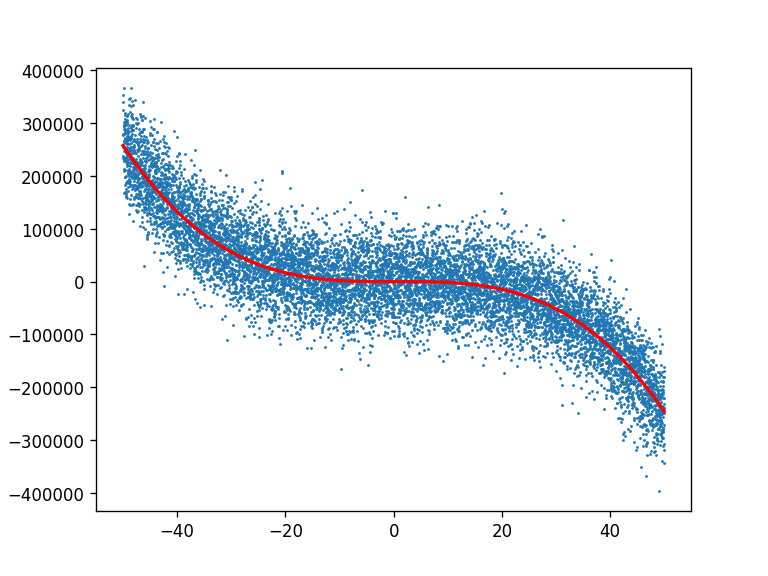

In [143]:
f = Fitter("poly")

p0, p1, p2,p3 = 2, -1,-1,-2
xx = np.arange(-50,50,0.01)

print(xx.shape)
yy = p3*xx**3+p0*xx**2+p1*xx+p2+np.random.normal(100, 50000, size = xx.shape)

f.fit(xx,yy,p0=4)
p = f.getParams()
print(f.par)
print(p)
print(p.a)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)